## <font size=5> <strong>Analysis about Drinking and LBXTR
 

## I. Importing essential libraries

In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')

['.git', '.idea', '.ipynb_checkpoints', 'ALQ.csv', 'Analysis about Drinking and LBXTR.ipynb', 'heart.csv', 'Heart_disease_prediction.ipynb', 'P_ALQ.XPT', 'P_TRIGLY.XPT', 'README.md', 'test.py', 'TRIGLY.csv']


## II. Importing and understanding our dataset 

In [153]:
dataset_alq = pd.read_csv('ALQ.csv')
dataset_trigly = pd.read_csv('TRIGLY.csv')

#### Delete rows including N/A

In [154]:
dataset_alq = dataset_alq.dropna()
dataset_trigly = dataset_trigly.dropna()

#### Printing out a few columns

In [155]:
dataset_trigly.head(5)

,SEQN,WTSAFPRP,LBXTR,LBDTRSI,LBDLDL,LBDLDLSI,LBDLDLM,LBDLDMSI,LBDLDLN,LBDLDNSI
0,109264.0,27533.174559,40.0,0.452,86.0,2.224,82.0,2.121,85.0,2.198
1,109271.0,18100.965319,84.0,0.948,97.0,2.508,96.0,2.483,98.0,2.534
2,109274.0,16281.758327,133.0,1.502,49.0,1.267,54.0,1.396,52.0,1.345
3,109277.0,32230.046209,24.0,0.271,64.0,1.655,62.0,1.603,61.0,1.577
4,109282.0,79007.100787,132.0,1.490,164.0,4.241,163.0,4.215,166.0,4.293


In [156]:
dataset_alq.head(5)

,SEQN,ALQ111,ALQ121,ALQ130,ALQ142,ALQ270,ALQ280,ALQ290,ALQ151,ALQ170
20,109315.0,1.0,1.0,4.0,1.0,3.0,10.0,0.0,1.0,30.0
22,109317.0,1.0,3.0,3.0,4.0,5.0,6.0,8.0,2.0,10.0
35,109335.0,1.0,7.0,6.0,7.0,10.0,7.0,0.0,1.0,0.0
39,109342.0,1.0,4.0,4.0,4.0,4.0,7.0,0.0,2.0,8.0
40,109346.0,1.0,4.0,2.0,5.0,6.0,10.0,0.0,1.0,1.0


#### Merge datasets and remove unused cols

In [177]:
merged_dataset = pd.merge(dataset_trigly, dataset_alq, on='SEQN', how='left').dropna()
merged_dataset = merged_dataset.drop(columns=['ALQ111', 'SEQN', 'LBDTRSI', 'LBDLDLSI',
                                              'LBDLDL', 'LBDLDLM', 'LBDLDMSI', 'LBDLDLN',
                                              'LBDLDNSI', 'WTSAFPRP'])

for col in ['ALQ121', 'ALQ130', 'ALQ142', 'ALQ270', 'ALQ280', 'ALQ290', 'ALQ151', 'ALQ170']:
    drop_index = merged_dataset[merged_dataset[col].isin([77, 99, 777, 999])].index
    print(drop_index,'deleted.')
    merged_dataset.drop(drop_index, inplace=True)

Int64Index([], dtype='int64') deleted.
Int64Index([2809, 3906], dtype='int64') deleted.
Int64Index([1243, 3271, 4280], dtype='int64') deleted.
Int64Index([498, 1289, 2376, 2688, 2881, 3820, 3899, 4379], dtype='int64') deleted.
Int64Index([560], dtype='int64') deleted.
Int64Index([3839], dtype='int64') deleted.
Int64Index([], dtype='int64') deleted.
Int64Index([3163, 3387], dtype='int64') deleted.


#### Reset index

In [178]:
merged_dataset = merged_dataset.reset_index(drop=True)
merged_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405 entries, 0 to 404
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   LBXTR   405 non-null    float64
 1   ALQ121  405 non-null    float64
 2   ALQ130  405 non-null    float64
 3   ALQ142  405 non-null    float64
 4   ALQ270  405 non-null    float64
 5   ALQ280  405 non-null    float64
 6   ALQ290  405 non-null    float64
 7   ALQ151  405 non-null    float64
 8   ALQ170  405 non-null    float64
dtypes: float64(9)
memory usage: 28.6 KB


#### Analysing the target LBXTR

In [179]:
LBXTR = merged_dataset['LBXTR']

#### Check correlation between columns

In [180]:
print(merged_dataset.corr()['LBXTR'].abs().sort_values(ascending=False))

LBXTR     1.000000
ALQ142    0.103444
ALQ130    0.080231
ALQ170    0.075111
ALQ280    0.063386
ALQ270    0.040558
ALQ290    0.035300
ALQ151    0.006804
ALQ121    0.000494
Name: LBXTR, dtype: float64


## Exploratory Data Analysis (EDA)

### First, analysing the target variable:

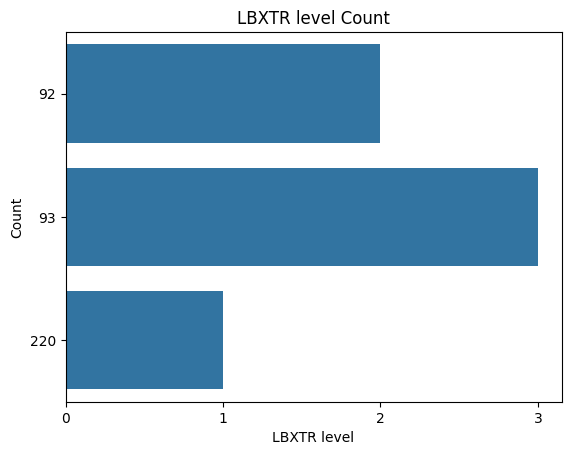

In [181]:
def category_lbxtr(x):
    if x<100:
        return 1
    elif x<150:
        return 2
    else:
        return 3
LBXTR_preprocessed = LBXTR.map(category_lbxtr)
merged_dataset['LBXTR'] = LBXTR_preprocessed
value_counts = LBXTR_preprocessed.value_counts().sort_index()

sns.barplot(x=value_counts.index, y=value_counts.values, orient='h')

plt.xticks([0,1,2,3])
plt.xlabel('LBXTR level')
plt.ylabel('Count')
plt.title('LBXTR level Count')

plt.show()

### Analysing the 'ALQ' connected features

In [182]:
merged_dataset["ALQ121"].value_counts().sort_index()
# ...

1.0     42
2.0     44
3.0     66
4.0     85
5.0     48
6.0     57
7.0     20
8.0     24
9.0     12
10.0     7
Name: ALQ121, dtype: int64

In [183]:
merged_dataset["ALQ130"].value_counts().sort_index()

1.0     16
2.0     54
3.0     75
4.0     78
5.0     51
6.0     46
7.0     10
8.0     33
9.0      3
10.0    15
12.0    14
13.0     1
15.0     9
Name: ALQ130, dtype: int64

In [184]:
merged_dataset["ALQ142"].value_counts().sort_index()

1.0     20
2.0     17
3.0     37
4.0     53
5.0     40
6.0     73
7.0     46
8.0     36
9.0     46
10.0    37
Name: ALQ142, dtype: int64

In [185]:
merged_dataset["ALQ270"].value_counts().sort_index()

0.0     140
1.0      13
2.0       8
3.0      14
4.0      17
5.0      30
6.0      25
7.0      39
8.0      17
9.0      32
10.0     70
Name: ALQ270, dtype: int64

In [186]:
merged_dataset["ALQ280"].value_counts().sort_index()

1.0       6
2.0      12
3.0      14
4.0      21
5.0      17
6.0      34
7.0      58
8.0      24
9.0      64
10.0    155
Name: ALQ280, dtype: int64

In [187]:
merged_dataset["ALQ290"].value_counts().sort_index()

0.0     224
1.0       2
2.0       4
3.0       7
4.0       9
5.0      17
6.0      14
7.0      20
8.0      10
9.0      25
10.0     73
Name: ALQ290, dtype: int64

In [188]:
merged_dataset["ALQ151"].value_counts().sort_index()

1.0    120
2.0    284
9.0      1
Name: ALQ151, dtype: int64

In [189]:
merged_dataset["ALQ170"].value_counts().sort_index()

0.0     89
1.0     65
2.0     58
3.0     33
4.0     36
5.0     27
6.0     14
7.0      6
8.0     11
9.0      1
10.0    18
12.0     9
15.0     9
18.0     1
20.0     8
30.0    20
Name: ALQ170, dtype: int64

## IV. Train Test split

In [190]:
from sklearn.model_selection import train_test_split

predictors = merged_dataset.drop("LBXTR",axis=1)
target = merged_dataset["LBXTR"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [191]:
X_train.shape

(324, 8)

In [192]:
X_test.shape

(81, 8)

In [193]:
Y_train.shape
print(Y_train)

395    2
252    2
388    1
75     1
64     1
      ..
323    3
192    1
117    1
47     1
172    3
Name: LBXTR, Length: 324, dtype: int64


In [194]:
Y_test.shape

(81,)

## V. Model Fitting

In [195]:
from sklearn.metrics import accuracy_score

### Logistic Regression

In [196]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

In [197]:
Y_pred_lr.shape

(81,)

In [198]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 53.09 %


### Naive Bayes

In [199]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)

In [200]:
Y_pred_nb.shape

(81,)

In [201]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 55.56 %


### SVM

In [202]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train, Y_train)

Y_pred_svm = sv.predict(X_test)

In [203]:
Y_pred_svm.shape

(81,)

In [204]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 53.09 %


### K Nearest Neighbors

In [205]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)

In [206]:
Y_pred_knn.shape

(81,)

In [207]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 55.56 %


### Decision Tree

In [208]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)

In [209]:
print(Y_pred_dt.shape)

(81,)


In [210]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 49.38 %


### XGBoost

In [211]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y_train = le.fit_transform(Y_train)

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, Y_train)

Y_pred_xgb = xgb_model.predict(X_test)

In [212]:
Y_pred_xgb.shape

(81,)

In [213]:
score_xgb = round(accuracy_score(Y_pred_xgb,Y_test)*100,2)

print("The accuracy score achieved using XGBoost is: "+str(score_xgb)+" %")

The accuracy score achieved using XGBoost is: 13.58 %


### Neural Network

In [214]:
from keras.models import Sequential
from keras.layers import Dense

AttributeError: partially initialized module 'keras.src' has no attribute 'utils' (most likely due to a circular import)

In [215]:
# https://stats.stackexchange.com/a/136542 helped a lot in avoiding overfitting

model = Sequential()
model.add(Dense(11,activation='relu',input_dim=13))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

NameError: name 'Sequential' is not defined

In [216]:
model.fit(X_train,Y_train,epochs=300)

NameError: name 'model' is not defined

In [68]:
Y_pred_nn = model.predict(X_test)

In [69]:
Y_pred_nn.shape

(61, 1)

In [70]:
rounded = [round(x[0]) for x in Y_pred_nn]

Y_pred_nn = rounded

In [71]:
score_nn = round(accuracy_score(Y_pred_nn,Y_test)*100,2)

print("The accuracy score achieved using Neural Network is: "+str(score_nn)+" %")

#Note: Accuracy of 85% can be achieved on the test set, by setting epochs=2000, and number of nodes = 11. 

The accuracy score achieved using Neural Network is: 80.33 %


## VI. Output final score

In [72]:
scores = [score_lr,score_nb,score_svm,score_knn,score_dt,score_rf,score_xgb,score_nn]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Decision Tree","Random Forest","XGBoost","Neural Network"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 85.25 %
The accuracy score achieved using Naive Bayes is: 85.25 %
The accuracy score achieved using Support Vector Machine is: 81.97 %
The accuracy score achieved using K-Nearest Neighbors is: 67.21 %
The accuracy score achieved using Decision Tree is: 81.97 %
The accuracy score achieved using Random Forest is: 95.08 %
The accuracy score achieved using XGBoost is: 85.25 %
The accuracy score achieved using Neural Network is: 80.33 %


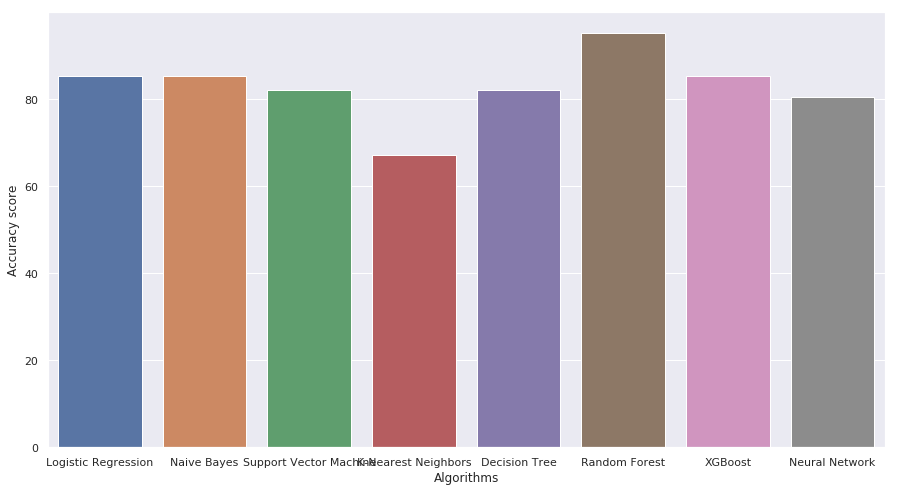

In [73]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)

### Hey arbaaz there random forest has good result as compare to other algorithms <br> <br>